In [1]:
import rdkit.Chem.AllChem as Chem
import json
import pandas as pd
import numpy as np
from mgktools.interpret.interpret import interpret_training_mols, interpret_atoms

/home/xiangyan/apps/miniconda3/envs/graph_attribution/lib/python3.10/site-packages/graphdot/codegen/sympy_printer.py:4: SymPyDeprecationWarning: 

The sympy.printing.cxxcode submodule is deprecated. It has been renamed to
sympy.printing.cxx.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-printing-code-submodules
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  from sympy.printing.cxxcode import CXX11CodePrinter


In [2]:
from mgktools.hyperparameters import product_pnorm
df = pd.read_csv('../datasets/freesolv.csv')
smiles_to_be_interpret = 'c1ccccc1CCO'
smiles_train = df.smiles
targets_train = df['freesolv']
n_mol = 10
alpha = 0.01
mgk_hyperparameters_file = product_pnorm

# Interpretation as the sum of the contribution of the molecules in training set

In [3]:
y_pred, y_std, df_interpret= interpret_training_mols(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    n_mol=10, 
    output_order='sort_by_value', 
    mgk_hyperparameters_file=mgk_hyperparameters_file,
    n_jobs=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 642 out of 642 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [4]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
print(df_interpret)

Prediction: -6.767058 +/- 2.045155

                               smiles_train  contribution_percentage  \
0                             c1ccc(cc1)CCO                 0.911021   
1                            c1ccc(cc1)CCCO                 0.022731   
2        c1ccc2c(c1)C(=O)c3cccc(c3C2=O)NCCO                 0.005893   
3                              c1ccc(cc1)CO                 0.010677   
4  C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O                 0.001245   
5                        c1ccc(cc1)Cn2ccnc2                 0.003381   
6                            c1ccc(cc1)OC=O                 0.006667   
7             c1ccc(cc1)n2c(=O)c(c(cn2)N)Cl                 0.001498   
8                       CN(C)C(=O)Nc1ccccc1                 0.002258   
9                CC(=O)OCC(COC(=O)C)OC(=O)C                 0.002226   

   contribution_value  
0           -6.185831  
1           -0.157299  
2           -0.083735  
3           -0.070679  
4           -0.029413  
5           -0.025797  
6  

# Interpretation as the sum of the contribution of atoms

In [5]:
y_pred, y_std, mol = interpret_atoms(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    mgk_hyperparameters_file=mgk_hyperparameters_file)

Prediction: -6.767275 +/- 0.531916



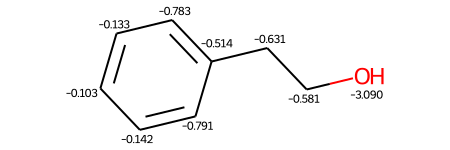

In [6]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
mol